<a href="https://colab.research.google.com/github/mayankjain281/Project_3_Aerofit/blob/main/Project_3_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-3 Aerofit
*   Imprort liberaries and dataset
*   Analysing basic metrics
*   Non Graphical Analysis
*   Visual Analysis
*   Outlier Detection
*   Business Insights
*   Recommendations







#Import libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/aerofit_treadmill.txt')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Product Purchased:	KP281, KP481, or KP781
# Age:	In years
# Gender:	Male/Female
# Education:	In years
# MaritalStatus:	Single or partnered
# Usage:	The average number of times the customer plans to use the treadmill each week.
# Income:	Annual income (in $)
# Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
# Miles:	The average number of miles the customer expects to walk/run each week

#Analysing basic metrics


In [ ]:
type(df)
#type of dataset is Pandas DataFrame

pandas.core.frame.DataFrame

In [ ]:
df.shape
#(rows, columns)

(180, 9)

In [ ]:
df.size
#total no. of elements

1620

In [ ]:
df.index
#df.index.values
#list(df.index)

RangeIndex(start=0, stop=180, step=1)

In [ ]:
df.index.size
#df.shape[0]
#len(df.index)
#len(df)

180

In [ ]:
df.columns
#df.keys()
#list(df.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.columns.size
#df.shape[1]
#len(df.columns)
#len(df.keys())

9

In [ ]:
df.info()
#Columns like 'Age', 'Education', 'Income', 'Miles' are continous
#Columns like 'Product', 'Gender', 'MaritalStatus',, 'Usage' 'Fitness' are categorical
#Columns 'Product','Gender','MaritalStatus', 'Usage' are of nominal type (have no proper order between the categories)
#Column'Fitness' is ordinal type, there's a order to the categories
#Column 'Fitness' is represented by numbers, but is is not representing a count or true measurement.
#So we are considering 'Fitness' columns as categorical variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()
#dataframe has no missing values in any column.
#no need for data cleaning or imputation.

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.describe().T
#descriptive statistics of continuous variables - mean, std, quartile, median, range

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
describe = df.describe(include='object')
describe.rename(index={'top':'Mode'}, inplace=True)
describe.loc['Mode %'] = describe.apply(lambda x: round(x[3]/x[0]*100,1))
describe
#descriptive statistics of categorical variables - mode value, mode frequency, mode percentage

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
Mode,KP281,Male,Partnered
freq,80,104,107
Mode %,44.4,57.8,59.4


# Non Graphical Analysis

In [ ]:
df.nunique()

# customer identities or names are not provided in dataframe.
# and no column has count of unique values same as len of rows.
# so we have the only default index values as unique identifier.

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
for col in df.columns:
  print('{} :{} ' . format(col,df[col].unique()))

# There are 3 different treadmills products.
# There are both Partnered and single customers
# Age of customers ranges from 18 to 50
# Education in years is from 12 -21
# Income of customers ranges appx 30k to 100k
# Usage is from 2 days to 7 days a week
# Fitness level of customers from 1 -5

Product :['KP281' 'KP481' 'KP781'] 
Age :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 
Gender :['Male' 'Female'] 
Education :[14 15 12 13 16 18 20 21] 
MaritalStatus :['Single' 'Partnered'] 
Usage :[3 2 4 5 6 7] 
Fitness :[4 3 2 1 5] 
Income :[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508] 
Miles :[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360] 


In [ ]:
unique = pd.DataFrame(df['Product'].unique(), columns=['Product'])
unique ['Gender'] = pd.DataFrame(df['Gender'].unique())
unique ['MaritalStatus'] = pd.DataFrame(df['MaritalStatus'].unique())
unique.fillna({'Gender':'-', 'MaritalStatus':'-'}, inplace = True)
unique

# Dataframe of unique values of categoric variables.

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP481,Female,Partnered
2,KP781,-,-


In [ ]:
val_count = df.Product.value_counts()
val_count = pd.DataFrame(val_count)
val_count['Percent'] = df.Product.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
val_count

# 44.4% Products sold are KP281 entry-level treadmill. (Mode)

,Product,Percent
KP281,80,44.4%
KP481,60,33.3%
KP781,40,22.2%


In [ ]:
data_crosstab = pd.crosstab(df['Product'],df['MaritalStatus'], margins = True,normalize="index")
data_crosstab.round(2)

# Mariginal probability: Probability of cutomers who purchased treadmill are Partnered is 0.59
# Conditional probabitity: Probability of who purchased KP781 treadmill are Partnered is 0.57

MaritalStatus,Partnered,Single
Product,,
KP281,0.60,0.40
KP481,0.60,0.40
KP781,0.57,0.42
All,0.59,0.41


In [ ]:
data_crosstab = pd.crosstab(df['MaritalStatus'],df['Gender'],margins = True, normalize="all")
data_crosstab.round(2)

#normalize over all values. Probability of single female customer is .17 over all customers.

Gender,Female,Male,All
MaritalStatus,,,
Partnered,0.26,0.34,0.59
Single,0.17,0.24,0.41
All,0.42,0.58,1.00


In [ ]:
data_crosstab = pd.crosstab(df['Product'],df['Usage'], margins = True, normalize="index")
data_crosstab.round(2)

# Cutomers who purchase KP281 KP81 are not tend to use treadmill more than 6 times in a week.
# Mostly customers usage treadmill 3 times in a week.

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.24,0.46,0.28,0.02,0.00,0.00
KP481,0.23,0.52,0.20,0.05,0.00,0.00
KP781,0.00,0.02,0.45,0.30,0.18,0.05
All,0.18,0.38,0.29,0.09,0.04,0.01


In [ ]:
df.corr().round(2)

# We will see crosstabs visually by using sns.heatmap or sns.joinplot

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


In [ ]:
df.corr().rank(axis="columns")

,Age,Education,Usage,Fitness,Income,Miles
Age,6.0,4.0,1.0,3.0,5.0,2.0
Education,1.0,6.0,3.0,4.0,5.0,2.0
Usage,1.0,2.0,6.0,4.0,3.0,5.0
Fitness,1.0,2.0,4.0,6.0,3.0,5.0
Income,1.0,5.0,2.0,3.0,6.0,4.0
Miles,1.0,2.0,4.0,5.0,3.0,6.0


#Visual Analysis

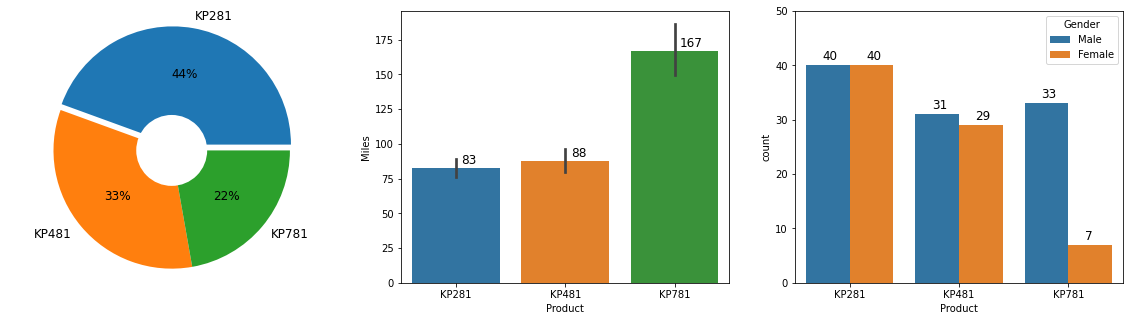

In [ ]:
plt.figure(figsize = [20,5])

plt.subplot(1, 3, 1)
x_bar = df.Product.value_counts().index
y_bar = df.Product.value_counts()
plt.pie(y_bar, labels =x_bar, autopct="%0.0f%%", explode=[.05,0,0], textprops={"fontsize":12})
centre_circle= plt.Circle((0,0),0.3,color='black', fc ='white',linewidth=0, )
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') 

plt.subplot(1, 3, 2)
ax = sns.barplot(data = df,x='Product', y = 'Miles')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.45, p.get_height()+3), size=12)

plt.subplot(1, 3, 3)
ax = sns.countplot(data=df, x="Product", hue='Gender')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.15, p.get_height()+1), size=12)
plt.ylim(0,50)

plt.show()

# Model KP281 is the best-selling product. 44% of all treadmill sales go to model KP281. (Popular Model)
# Customers who usage KP781 treadmills run more miles per week than Customers who usage other treadmills.
# KP281 and KP481 is equally preferred by men and women. KP781 is most preferred by men and least by women.

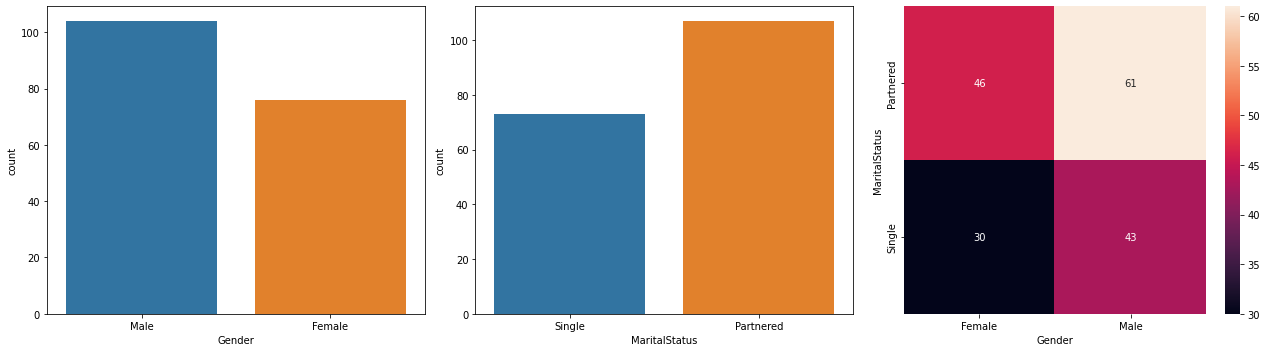

In [ ]:
plt.figure(figsize = [18,5])

plt.subplot(1, 3, 1)
x_bar = df.Product.value_counts().index
y_bar = df.Product.value_counts()
sns.countplot(data=df, x="Gender")

plt.subplot(1, 3, 2)
sns.countplot(data=df, x="MaritalStatus")

plt.subplot(1, 3, 3)
ct_counts = df.groupby(['Gender', 'MaritalStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'MaritalStatus', columns = 'Gender', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')

plt.tight_layout()
plt.show()

# Majority of customers are Married Male and minority of customers are Single Female.
# I created heatmap for two categorica variable by using groupby, pivot, value counts.
# Similar heatmap we can make by sns.joinplot but there we can not annot the grids.

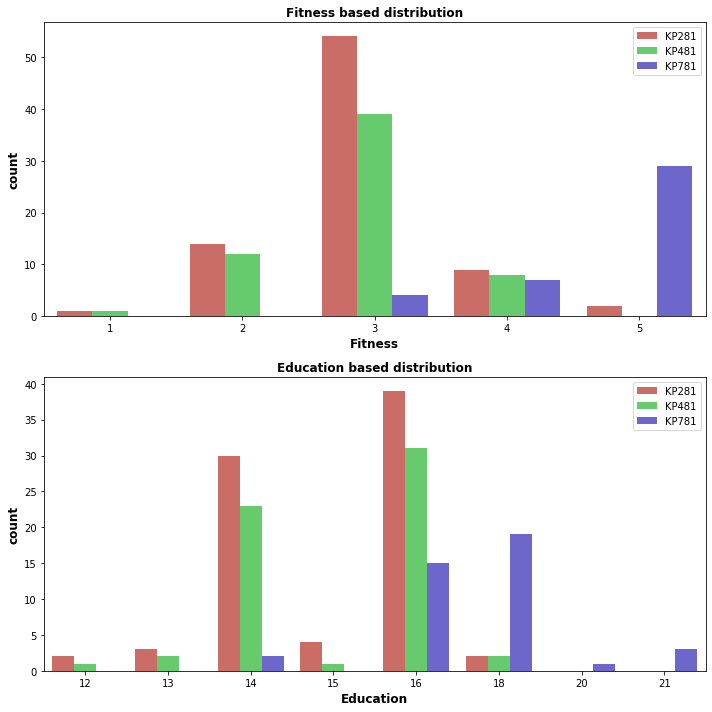

In [ ]:
col_names = ["Fitness","Education"]

col_names1 = ["Income","Usage"]
fig,ax = plt.subplots(nrows=len(col_names),figsize=(10,10))
rows = 0
for col in col_names:
  title = col+" based distribution"
  sns.countplot(x=df[col],hue="Product",data=df,palette="hls",ax=ax[rows])
  #g1 = sns.catplot(x=col,y="Income",hue="Product",kind='box',data=df,ax=ax[ro
  ax[rows].set_title(title, fontweight="bold",fontsize=12)
  ax[rows].set_ylabel("count",fontweight="bold",fontsize=12)
  ax[rows].set_xlabel(col,fontweight="bold",fontsize=12)
  ax[rows].legend(loc='upper right')
  rows+=1
fig.tight_layout()
plt.show()

# Customer with moderate fitness level, prefer using KP281 or KP481.
# Customers with more than higer fitness level prefer using KP781.
# Customer above 20 years education, purchase only KP781 model.
# Customer below 13 years education, never purchase KP781 model.

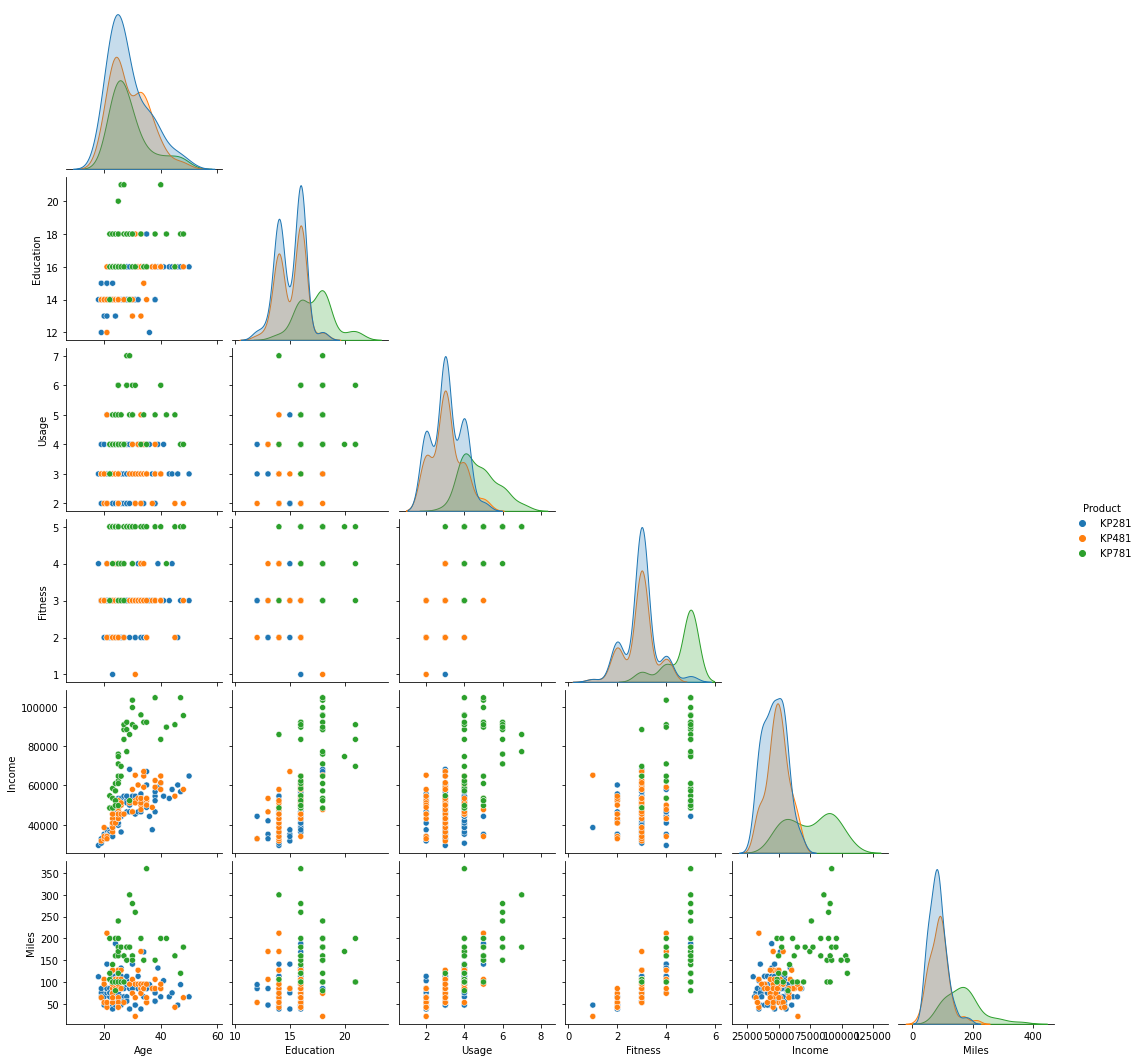

In [ ]:
sns.pairplot(data = df, hue= 'Product', corner=True)
plt.show()

# Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. 
# This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. 
# This is essential when we are exploring our dataset and trying to become familiar with it.

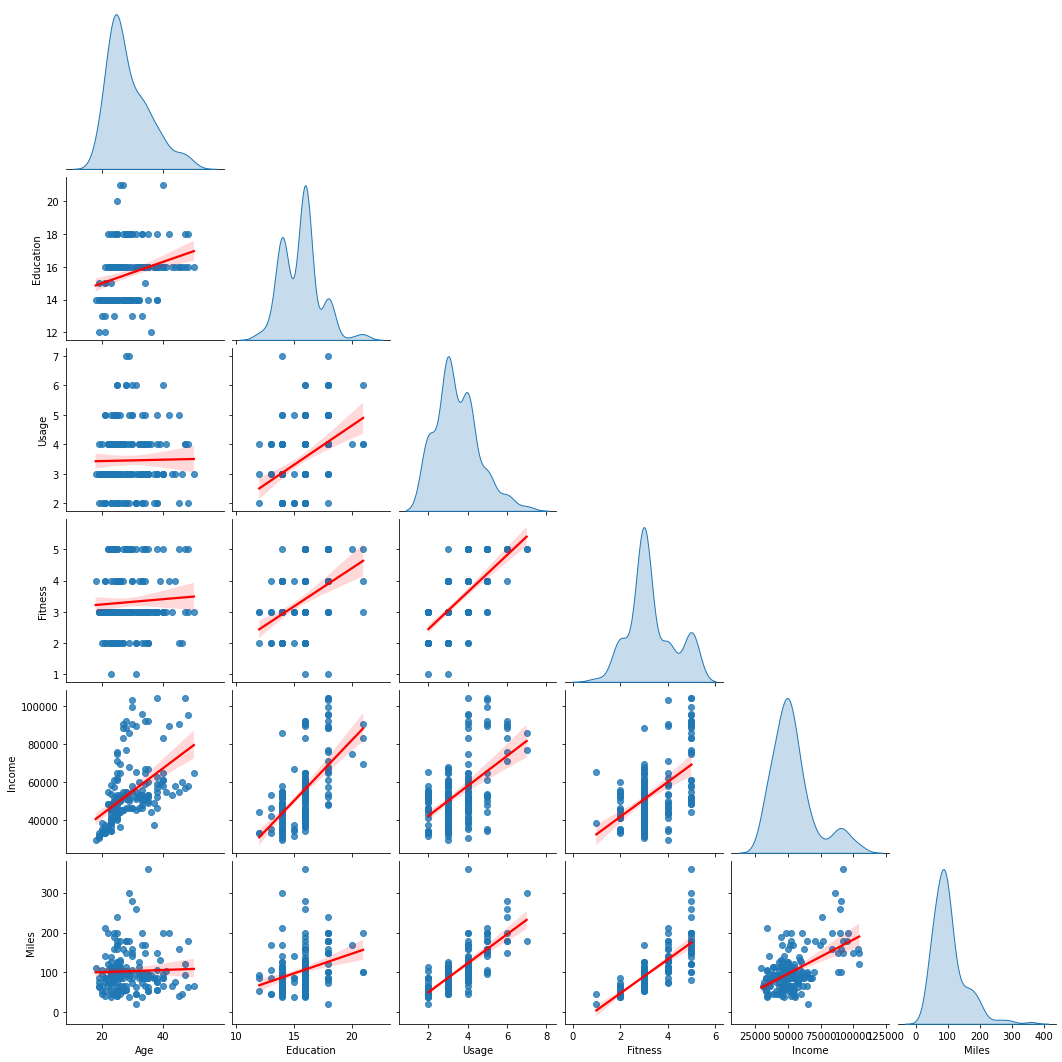

In [ ]:
sns.pairplot(df, kind='reg', diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.show()

# We can see scatter plots with regression line and confidence interval band.
# A regression line is an estimate of the line that describes the linear relationship between the two variables.
# Miles and fitness columns have correlation coefficient approximatly 1.
# so we can see that the correlation solpe is positive.
# no plot has negative regression line or slope.

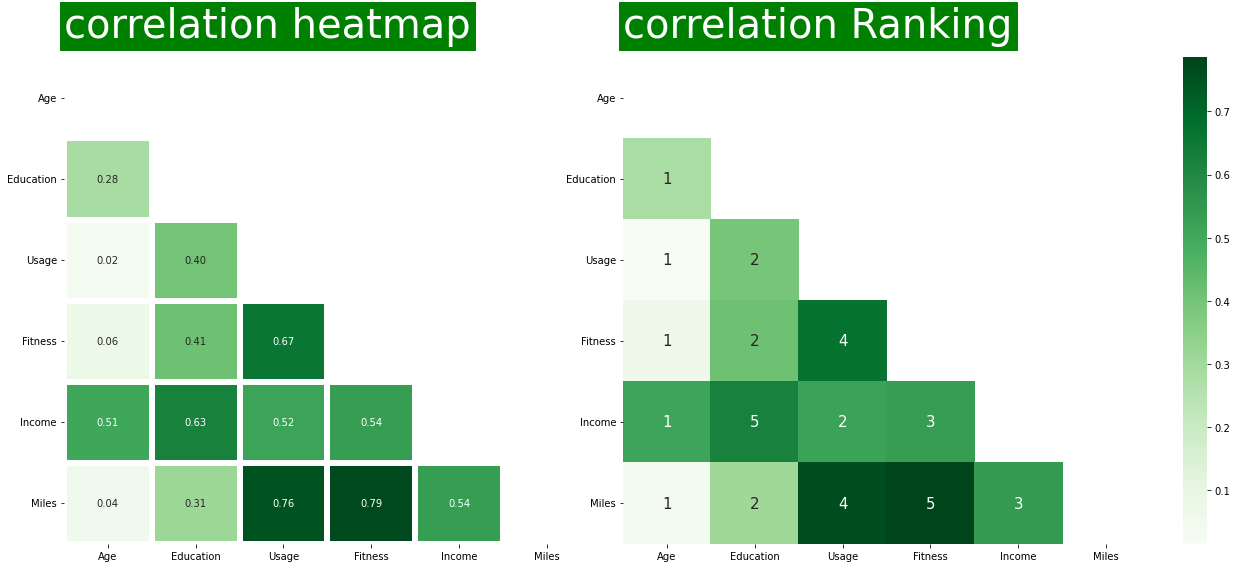

In [ ]:
fig=plt.figure(figsize = [18,8])

plt.subplot(1, 2, 1)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr().round(2), cmap= "Greens", annot=True, mask=mask, fmt=".2f", linewidths=5, vmin=0, vmax=0.8)
plt.tight_layout()
plt.title('correlation heatmap', color='w',fontsize=40, fontweight = 'normal',backgroundcolor = 'g', pad = 20, loc='left')
plt.yticks(rotation = 0)

plt.subplot(1, 2, 2)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=df.corr().rank(axis="columns"), cmap= "Greens", mask=mask, annot_kws={"size": 15})

plt.tight_layout()
plt.title('correlation Ranking', color='w',fontsize=40, fontweight = 'normal',backgroundcolor = 'g', pad = 20, loc='left')
plt.yticks(rotation = 0)
plt.show()

# No variables have negative correlation.
# Miles and fitness columns are mostly correlated.
# There is no corelation between Usage & Age or Fitness & Age or Miles & Age.
# That means Age should notbe barrier to use treadmills frequently or use specific model of treadmills.
# Income and education show a strong correlation. we can say like one who Learnt more, earn more.
# High income and highly educated people prefer to purchase high-end premium models (KP781).

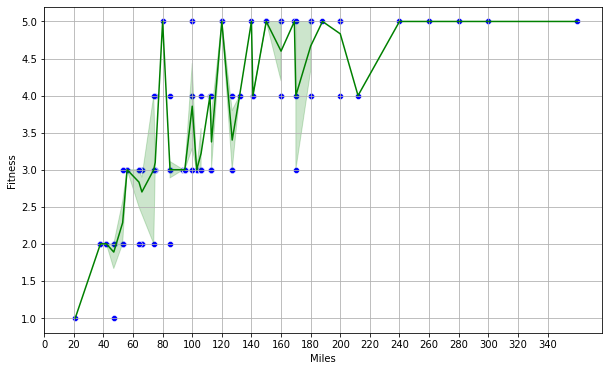

In [ ]:
fig=plt.figure(figsize = [10,6])
sns.scatterplot(x='Miles', y='Fitness', data=df, color='b')
sns.lineplot(x='Miles', y='Fitness', data=df, color='g')
plt.xticks(np.arange(0, 350, step = 20))
plt.grid()
plt.show()

# Customers who run more miles each week give higher fitness rating.
# Customers who ran more than 140 miles each week, never gave fitness rating less than 4.

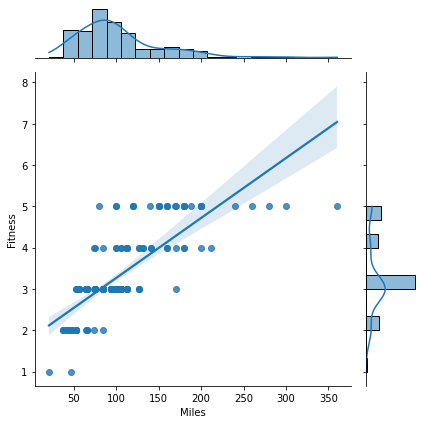

In [ ]:
sns.jointplot(x='Miles', y='Fitness', data=df, kind='reg')
plt.tight_layout()
plt.show()

# We can see scatter plots with regression line and confidence interval band. we can remove band by ci=None.
# Miles and fitness columns have correlation coefficient approximatly 1.
# so we can see that the correlation solpe is poitive.
# Finess categorical variable even it has numarical values.

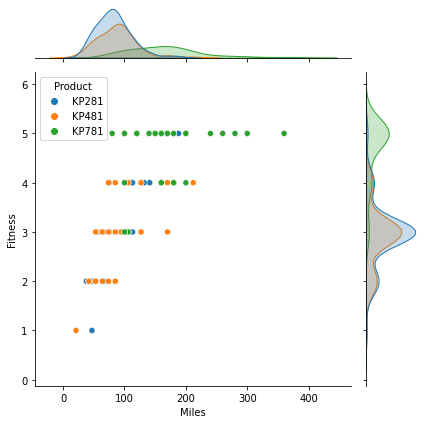

In [ ]:
sns.jointplot(x='Miles', y='Fitness', hue='Product', data=df)
plt.tight_layout()
plt.show()

# With Fitness level 4 and 5, the customers tend to use high-end models and the average number of miles is above 150 per week.

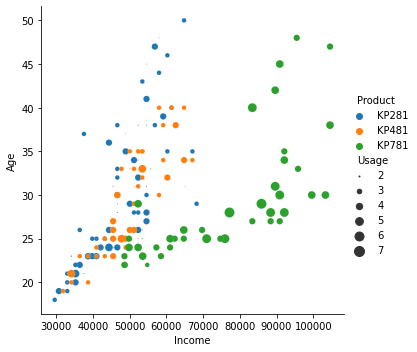

In [ ]:
sns.relplot(data=df, y="Age", x="Income", hue='Product', size="Usage", sizes=(1, 100))
plt.show()

# Customers with higher age have higher income. Customer with higher income tends to buy KP781 treadmill.
# Customers who purchased KP781 usage treadmill more times than customers who purchased other treadmill.

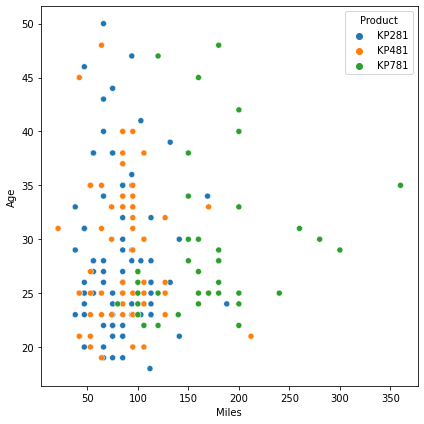

In [ ]:
plt.figure(figsize = [6,6])
sns.scatterplot(x='Miles', y='Age',hue='Product', data=df)
plt.tight_layout()
plt.show()

# There is no corelation between Usage & Age or Fitness & Age
# miles and age columns have correlation coefficient approximatly 0.
# average running distance is not dependet on age.

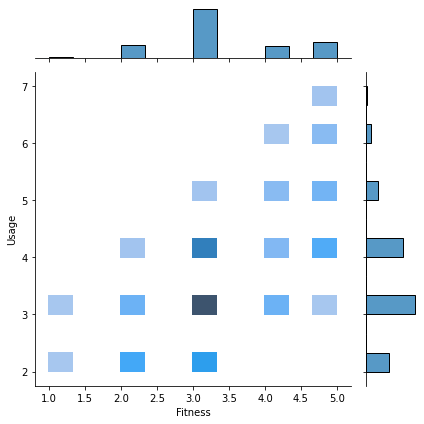

In [ ]:
sns.jointplot(x='Fitness', y='Usage',  data=df, kind='hist')
plt.tight_layout()
plt.show()

# Column 'Fitness' and 'Usage' is represented by numbers, but is is not representing a count or true measurement.
# That is why we are properly arranged points, not scattered poins.
# Fitness and Usage variables are correlated, customers who usage treadmill more, have more fitness.

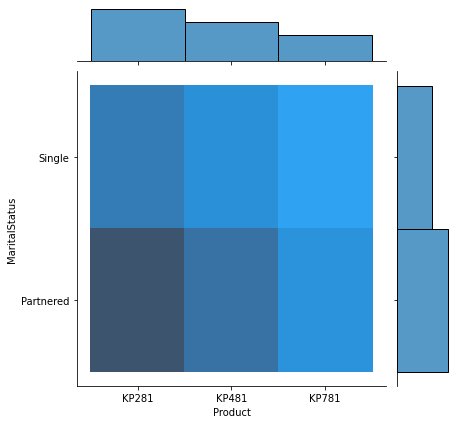

In [ ]:
sns.jointplot(x='Product', y='MaritalStatus',  data=df, kind='hist')
plt.show()

# joinplot represents the magnitude of the counts in form of colors intensity.
# Partnered customers are more tend to purchased treadmill.

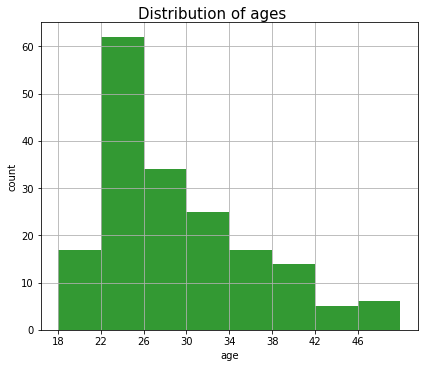

In [ ]:
fig=plt.figure(figsize = [6,5])
count, bins, _ = plt.hist(df["Age"], bins=8, color='g', alpha=0.8)
plt.xticks(np.arange(18, 50, step = 4))
fig.suptitle('Distribution of ages', fontsize=15, va='baseline')
plt.xlabel('age', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.tight_layout()
plt.grid()
plt.show()

# plt.hist() method uses numpy.histogram to bin the data in x and count the number of values in each bin, 
# It draws the distribution as a BarContainer.
# This plot is positively skewed, means it has more outliers in right side.
# Usage of treadmills are popular among 22-26 age group.

In [ ]:
age_bins=pd.DataFrame({'from':bins[:-1],'to':bins[1:],'count':count}).astype(int)
age_bins

,from,to,count
0,18,22,17
1,22,26,62
2,26,30,34
3,30,34,25
4,34,38,17
5,38,42,14
6,42,46,5
7,46,50,6


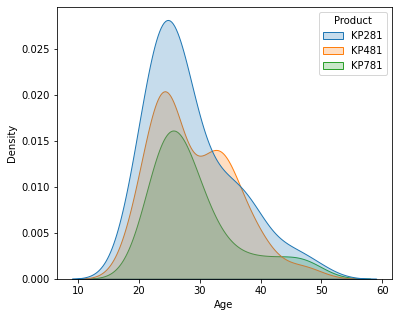

In [ ]:
fig=plt.figure(figsize = [6,5])
sns.kdeplot(df['Age'],hue=df["Product"], shade = True)
plt.show()

# Customer form age group 30-40 more prefer to purchase KP481 mid-level treadmill over other treadmills.

#Outlier Detection

In [ ]:
df.quantile(0.95)

# 5% Customers have annual income more than 90K. 
# 95% Customers are below age 43.

Age             43.05
Education       18.00
Usage            5.05
Fitness          5.00
Income       90948.25
Miles          200.00
Name: 0.95, dtype: float64

- If the data variables would be symmetric distributed (skewness zero) then we could use empirical relations of Normal distribution. 
- The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.
- But form the below code we can see variables are Skewed distributed so we will use Inter-Quartile Range (IQR) proximity rule. 
- The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [ ]:
df.skew(axis = 0, skipna = True)

<ipython-input-42-c789b15bf834>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64


- The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

- From the code above, the 'Income' skewness value of 1.29 shows the variable has been rightly skewed, indicating the presence of outliers.

- We will replace the outliers values with the median or mode value, we are not using mean values because it is highly susceptible to outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


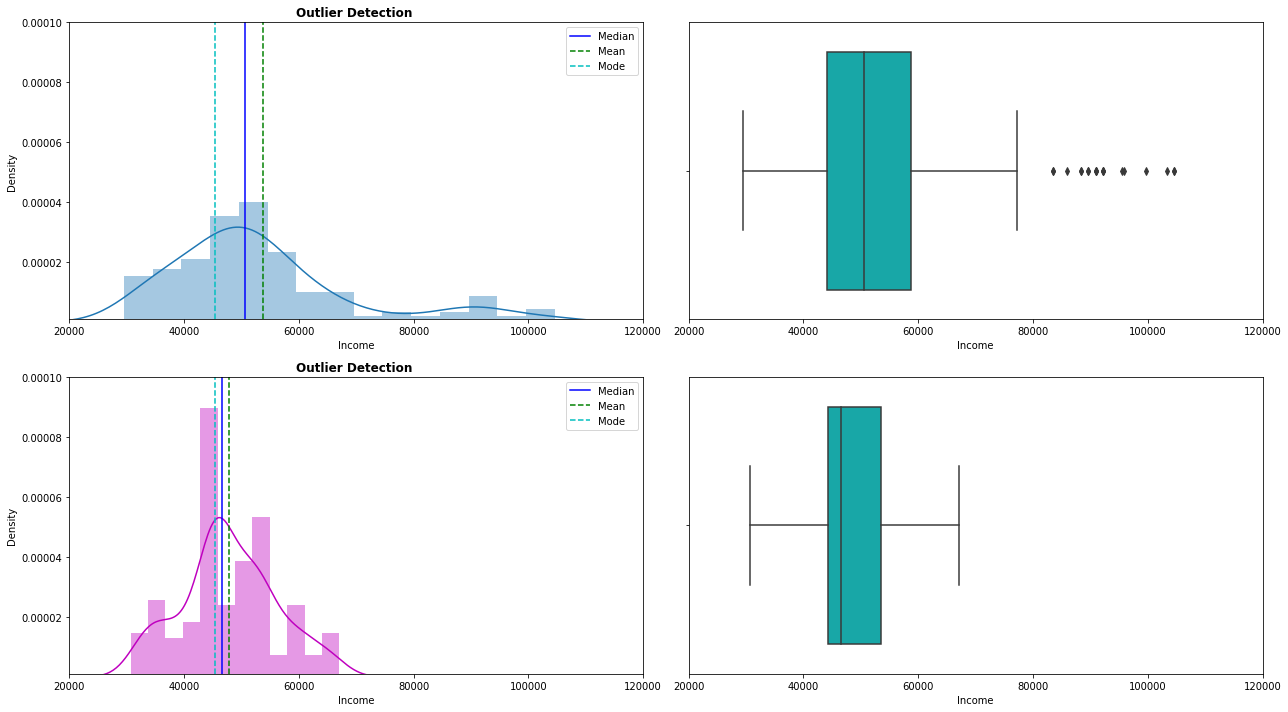

In [ ]:
new=df.copy()
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
d=new['Income']
n=1
while n!=0:
  for y in find_outliers_IQR(d).index:
    new.loc[y, 'Income']=int(d.mode())   
    n=len(find_outliers_IQR(d).index)

plt.figure(figsize = [18,10])
plt.subplot(2, 2, 1)
sns.distplot(df['Income'],hist=True)
plt.axvline(df['Income'].median(),color='b', linestyle='-',label="Median")
plt.axvline(df['Income'].mean(),color='g', linestyle='--',label="Mean")
plt.axvline(df['Income'].mode()[0],color='c', linestyle='--',label='Mode')
plt.legend(loc='best')
plt.title("Outlier Detection ", fontweight="bold")
plt.ylim(0.000001,0.0001)
plt.xlim(20000,120000)

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Income"], color='c')
plt.xlim(20000,120000)

plt.subplot(2, 2, 3)
sns.distplot(new['Income'],color='m',hist=True)
plt.axvline(new['Income'].median(),color='b', linestyle='-',label="Median")
plt.axvline(new['Income'].mean(),color='g', linestyle='--',label="Mean")
plt.axvline(new['Income'].mode()[0],color='c', linestyle='--',label='Mode')
plt.legend(loc='best')
plt.title("Outlier Detection ", fontweight="bold")
plt.ylim(0.000001,0.0001)
plt.xlim(20000,120000)

plt.subplot(2, 2, 4)
sns.boxplot(x=new["Income"], color='c')
plt.xlim(20000,120000)
plt.tight_layout()
plt.show()
# Positive skewness, outliers are present above the higher outlier threshold

8
1
1
0


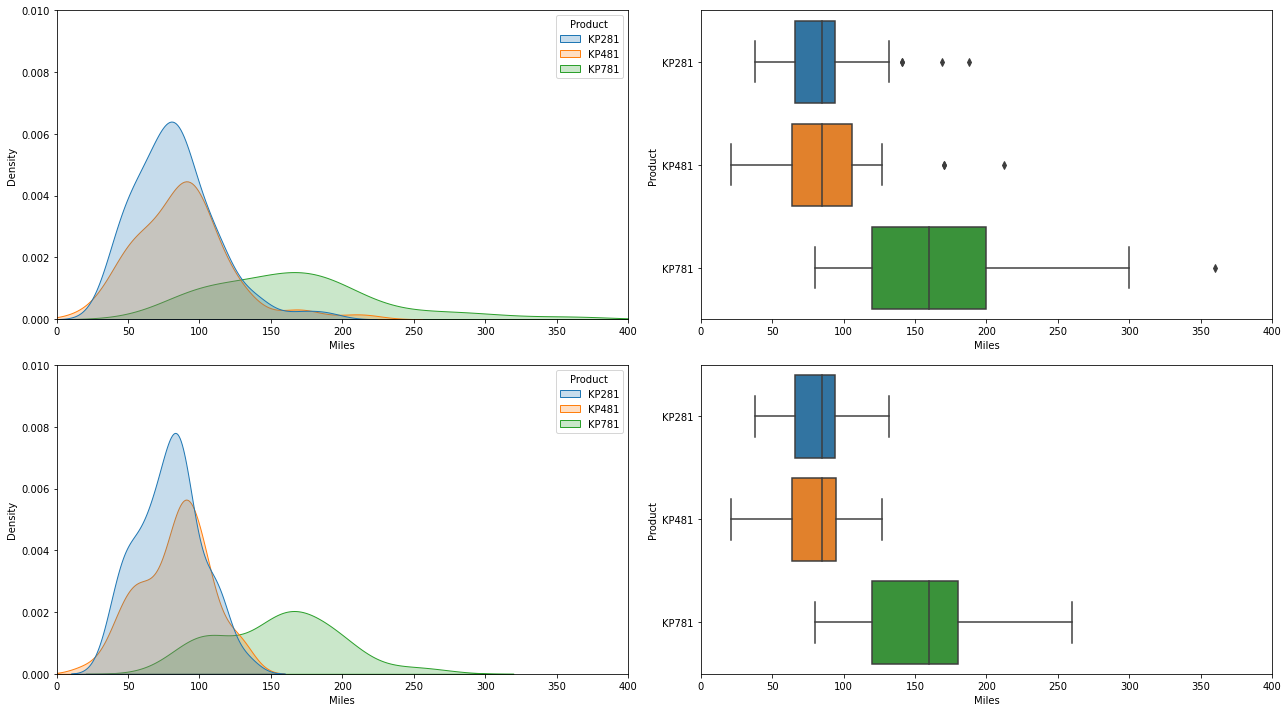

In [ ]:
new=new.copy()

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

n=1
while n!=0:
  n=0
  for x in df.Product.value_counts().index:
    d=new[new['Product']==x]['Miles']
    n+=len(find_outliers_IQR(d).index)
    for y in find_outliers_IQR(d).index:
      new.loc[y, 'Miles']=int(d.median())  # d.median() or d.quantile(0.5)
  print(n)
  
plt.figure(figsize = [18,10])
plt.subplot(2, 2, 1)
sns.kdeplot(df['Miles'],hue=df["Product"], shade = True)
plt.xlim(0,400)
plt.ylim(0,0.01)

plt.subplot(2, 2, 2)
sns.boxplot(x='Miles', y='Product', data=df)
plt.xlim(0,400)

plt.subplot(2, 2, 3)
sns.kdeplot(new['Miles'],hue=df["Product"], shade = True)
plt.xlim(0,400)
plt.ylim(0,0.01)

plt.subplot(2, 2, 4)
sns.boxplot(x = 'Miles', y = 'Product', data = new)
plt.xlim(0,400)
plt.tight_layout()
plt.show()
# Positive skewness, outliers are present above the higher outlier threshold

Insight

- Both Miles and Income have significant outliers based on the above boxblot.

- Also both are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

- Majority of Customers fall within the USD 40,000 - USD 60,000 range
There are outliers over USD 85,000

- Majority of customers who purchased KP781 run more than 100 miles per week

- Majority of customers who purchased KP281 and KP281 run less than 100 miles per week

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Education,180.0,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
Usage,180.0,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,47913.116667,8193.641033,30699.0,44343.0,46617.0,53439.0,67083.0
Miles,180.0,97.327778,42.029230,21.0,66.0,85.0,113.0,260.0


In [ ]:
df.skew().round(2)

<ipython-input-47-87a00b0dd099>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().round(2)


Age          0.98
Education    0.62
Usage        0.74
Fitness      0.45
Income       1.29
Miles        1.72
dtype: float64

In [ ]:
new.skew().round(2)

<ipython-input-48-844a19ba9534>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new.skew().round(2)


Age          0.98
Education    0.62
Usage        0.74
Fitness      0.45
Income       0.12
Miles        1.20
dtype: float64

- We can clearly see that after imputation on outliers, the skewness of Income and Miles columns have decreased. We can see in graph, density increased.

- By using new.drop(y, inplace=True) we could remove the outliers rows, but instead of removing we imputed median/mode/mean values to presurve all rows.

# Business Insights

- Model KP281 is the best-selling product. 44% of all treadmill sales go to model KP281 (Popular product).
- High income and highly educated customers prefer to purchase models KP781 (Premium product).
- Customers who use KP781 treadmills run more miles per week than customers who use other treadmills.


- Partnered customers are more tend to purchas treadmill.
- Majority of customers are Married Male and minority of customers are Single Female.
- KP281 and KP481 is equally preferred by Male and Female. KP781 is most preferred by Male and least by Female.


- Usage of treadmills are popular among 22-26 age group.
- Customer form age group 30-40 more prefer to purchase KP481 mid-level treadmill. 93% Customers are below age 40.

- Majority of Customers fall within the 40K-60K range annual income There are 5% customers over 90K income.

- Majority of customers who purchased KP781 run more than 100 miles per week
- Majority of customers who purchased KP281 and KP281 run less than 100 miles per week

- Customers who run more miles each week have higher fitness rating.
- Customers who ran more than average 140 miles per week, have fitness average fitness rating 4 or above.

(All the appropriate insights have been mentioned after every code/graph with relevant analysis.)

#Recommendations

- Company should use **Young Married** couple as product ambassador to promote KP281 treadmill.
Because KP281 is most purchased treadmill, most customers are married couples in the 20 to 30 age group.
- Company can use any **Female model** as product ambassador to promote KP481. It may inspire Females to use treadmill.
- Company must use a **Male athlete** Champion as product ambassador for KP781. Because customers who use KP781 treadmills run more miles per week. Company can promote it's KP781 treadmill by launching campaigns that strive to bring inspiration to everyone who loves to run. Company can use highly motivating slogans in advertisements and make inspiring Taglines raise awareness about the overall brand.
- Company can bring **KP281 treadmill** to the entry level target audience by Sponsorships Sports and Events in colleges or inside the mall. Once the Company sells KP281 treadmill to entry level customers then after some time Company should contact them and recommend upgrading to **KP481 treadmill** once they reach mid level or started running more miles on old treadmill. Company can give discount for their existing customers.
- Company can bring the rich audience customers to the **KP781 treadmill** by keeping it in the premium and advanced featured segment. establishing a strong and consistent branding. That will make easily recognizable among those Target customers who are educated high paying working professionals and disciplined to run every day on the treadmill in order to keep body healthy, fit, and energetic.